<a href="https://colab.research.google.com/github/tamaravera14/SIMULACI-N-I/blob/main/Cadenas_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Tablero de colores***

---

Bazaldua Vera Tamara Alheli

---

## **PROBABILIDAD TOTAL**

## Simulación de lanzamiento de dos monedas
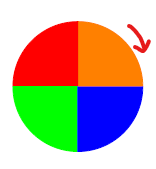
*Supongamos que tenemos en un tablero con cuatro sectores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento….*

**¿Son todos los sectores igual de probables cuando pase mucho tiempo?**

***Solución Analítica.***

# **Descripción del experimento**

La **variable de estado** es la posición de la ficha:**verde, naranja, azul, rojo.**

Las posibles salidas de las monedas son:

$CC, CX, XC, XX \Rightarrow$ todas con probabilidad  $\frac{1}{4}$


Denotamos:

* $x_n$: probabilidad del sector naranja tras $n$ lanzamientos.
* $y_n$: probabilidad del sector azul tras $n$ lanzamientos.
* $z_n$: probabilidad del sector verde tras $n$ lanzamientos.
* $t_n$: probabilidad del sector rojo tras $n$ lanzamientos.

## **Cálculo de probabilidades usando el Teorema de la Probabilidad Total**

### Ecuaciones de transición basadas en el teorema de la probabilidad total $(n=1)$

1. $x_1:$ probabilidad de estar en naranja tras un paso
   * $x_1 = \frac{1}{4}x_0 + 0 \cdot y_0 + \frac{1}{4}z_0 + \frac{1}{2}t_0$

2. $y_1:$ probabilidad de estar en azul tras un paso
  * $y_1 = \frac{1}{2}x_0 + \frac{1}{4}y_0 + 0 \cdot z_0 + \frac{1}{4}t_0$

3. $z_1:$ probabilidad de estar en verde tras un paso
  * $z_1 = \frac{1}{4}x_0 + \frac{1}{2}y_0 +\frac{1}{4}z_0 + 0 \cdot t_0$

4. $t_1:$ probabilidad de estar en rojo tras un paso
  * $t_1 = 0 \cdot x_0 + \frac{1}{4}y_0 + \frac{1}{2}z_0 + \frac{1}{4}t_0$


**Nota:**
Estas expresiones surgen al aplicar el Teorema de la Probabilidad Total:

$
P(A) = P(A \mid B_1)P(B_1) + P(A \mid B_2)P(B_2) + \dots + P(A \mid B_n)P(B_n)
$



## ***Modelo de Transición Estocástico***

Análogamente para $( n = 2 )$ se continúa el proceso utilizando los valores obtenidos de $( x_1, y_1, z_1, t_1 )$

En general, el sistema de probabilidades se expresa matricialmente como:

$$
\begin{pmatrix}
x_n \\
y_n \\
z_n \\
t_n
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
\begin{pmatrix}
x_{n-1} \\
y_{n-1} \\
z_{n-1} \\
t_{n-1}
\end{pmatrix}
$$

Denotando:

$$
\mathbf{x}_n = A \mathbf{x}_{n-1}
\quad \Rightarrow \quad
\mathbf{x}_n = A^n \mathbf{x}_0
$$

Para resolver el problema debemos calcular $( A^n ).$

---

# ***Solución Analítica:***

---

### ***Problema:***

Supongamos que tenemos un tablero con cuatro sectores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Queremos saber:

$$\textit{¿Son todos los sectores igual de probables cuando pase mucho tiempo?}$$

**Matriz de transición**

$$
A =
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{2} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{1}{2} & \frac{1}{4}
\end{pmatrix}
$$

**Distribución estacionaria**

Buscamos la solución al sistema:

$$
\begin{cases}
x_n = \frac{1}{4}x_n + \frac{1}{2}y_n + \frac{1}{4}z_n \\
y_n = \frac{1}{4}y_n + \frac{1}{2}z_n + \frac{1}{4}t_n \\
z_n = \frac{1}{4}x_n + \frac{1}{4}z_n + \frac{1}{2}t_n \\
t_n = \frac{1}{2}x_n + \frac{1}{4}y_n + \frac{1}{4}t_n \\
x_n + y_n + z_n + t_n = 1
\end{cases}
$$

**Solución:**

Resolviendo el sistema anterior, se obtiene:

$$
x_n = y_n = z_n = t_n = \frac{1}{4}
$$

Todos los sectores son igual de probables cuando pasa mucho tiempo:

$$
\boxed{
x_n = y_n = z_n = t_n = \frac{1}{4}
}
$$

---

# ***Solución con simulación:***

---

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

1 := Cara

0 := Cruz

---

Para simular el avance en un tablero con 4 sectores (Naranja, Azul, Verde y Rojo), se realiza el lanzamiento de dos monedas. En nuestra simulación, representamos cada lanzamiento con un número aleatorio:

*  $1$: Cara
*  $0$: Cruz

Donde **M1** y **M2** representan los resultados de las dos monedas. La suma **M1 + M2** devuelve el número total de caras obtenidas, lo cual determina el número de pasos que se avanzará en el tablero.

Tabla de posibles resultados

|**Moneda 1 (M1)**|**Moneda 2 (M2)**|**Pasos (M1 + M2)**|
|-----------------|-----------------|-------------------|
|     0 (Cruz)    |     0 (Cruz)    |         0         |
|     0 (Cruz)    |     1 (Cara)    |         1         |
|     1 (Cara)    |     0 (Cruz)    |         1         |
|     1 (Cara)    |     1 (Cara)    |         2         |


**Interpretación**

Cada vez que se realiza el experimento, se determina el número de pasos a avanzar en el tablero en sentido horario, dependiendo de la cantidad de caras obtenidas. Este valor puede ser 0, 1 o 2.

---

La función **lanzar_monedas()** se define como:

In [3]:
def lanzar_monedas():
    M1 = random.randint(0, 1)
    M2 = random.randint(0, 1)
    return M1 + M2  # Número de caras (saltos)

**Función simular_movimiento_dicc(n)**

Esta función simula el movimiento aleatorio de una ficha sobre un tablero circular de 4 sectores (colores), donde el número de pasos en cada turno se determina mediante el lanzamiento de dos monedas.

**Objetivo**

Simular $n$ movimientos sobre un tablero circular de 4 sectores y contar cuántas veces se visita cada uno.
Devuelve un diccionario con la cantidad de visitas a cada sector tras $n$ movimientos.

**Simbología**

* 0 := Naranja
* 1 := Azul
* 2 := Verde
* 3 := Rojo

In [4]:
def simular_movimiento_dicc(n):
    # Diccionario que asigna un color a cada posición del tablero
    sectores = {0: 'Naranja', 1: 'Azul', 2: 'Verde', 3: 'Rojo'}

    # Inicializa un diccionario para contar cuántas veces cae en cada color
    conteo = {color: 0 for color in sectores.values()}

    # Se comienza en la posición 0, que corresponde al color Naranja
    posicion = 0

    # Repite el experimento n veces
    for _ in range(n):
        # Lanza dos monedas y obtiene el número de pasos a avanzar (0, 1 o 2)
        pasos = lanzar_monedas()
        # Actualiza la posición sumando los pasos y aplicando módulo 4 para mantener el ciclo
        posicion = (posicion + pasos) % 4
        # Obtiene el color correspondiente a la nueva posición
        color_actual = sectores[posicion]
        # Incrementa en 1 el conteo del color actual
        conteo[color_actual] += 1

    # Devuelve el diccionario con la cantidad de visitas por color
    return conteo

**Función simular_movimiento_dicc(n)**

Simula el experimento **n** veces para generar una proporción y probabilidad de cuántas veces se aterriza en cada uno de los colores del tablero (Naranja, Azul, Verde y Rojo).

En cada iteración, se lanza un par de monedas para determinar el número de pasos a avanzar, y se registra el color en el que se aterriza. La función cuenta las visitas a cada sector mediante un diccionario y devuelve el total de visitas por color.

In [5]:
def experimento(n):
    # Llama a la función que simula el movimiento y obtiene el conteo caidas por color
    conteo = simular_movimiento_dicc(n)

    # Diccionario para guardar las proporciones de cada color
    proporciones = {}

    # Imprime encabezado de resultados
    print("Resultados del experimento:\n")

    # Recorre cada color y su cantidad de visitas
    for color, cantidad in conteo.items():
        # Calcula la proporción dividiendo la cantidad de visitas entre el total de intentos
        proporción = cantidad / n
        # Guarda la proporción en el diccionario
        proporciones[color] = proporción
        # Imprime el número de visitas
        print(f"{color}: {cantidad} veces")
        # Imprime la proporción con 4 decimales
        print(f"Proporción: {proporción:.4f}\n")

    # Devuelve las proporciones y el conteo total
    return proporciones, conteo


In [6]:
# Ejecutar experimento
n = 100000
proporciones, conteo = experimento(n)


Resultados del experimento:

Naranja: 24979 veces
Proporción: 0.2498

Azul: 25132 veces
Proporción: 0.2513

Verde: 24911 veces
Proporción: 0.2491

Rojo: 24978 veces
Proporción: 0.2498



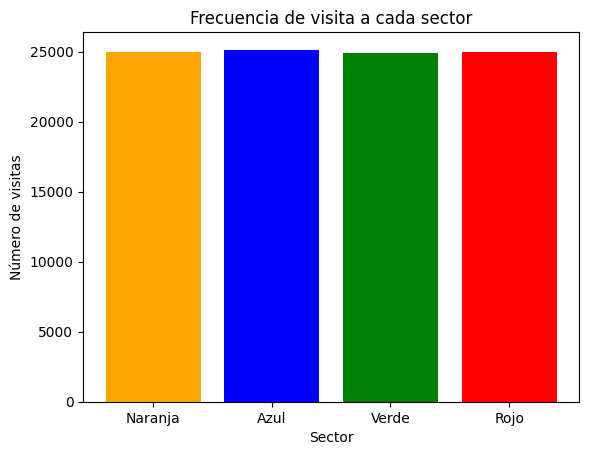

In [7]:
# Gráfica (fuera de la función)
plt.bar(conteo.keys(), conteo.values(), color=['orange', 'blue', 'green', 'red'])
plt.title("Frecuencia de visita a cada sector")
plt.ylabel("Número de visitas")
plt.xlabel("Sector")
plt.show()

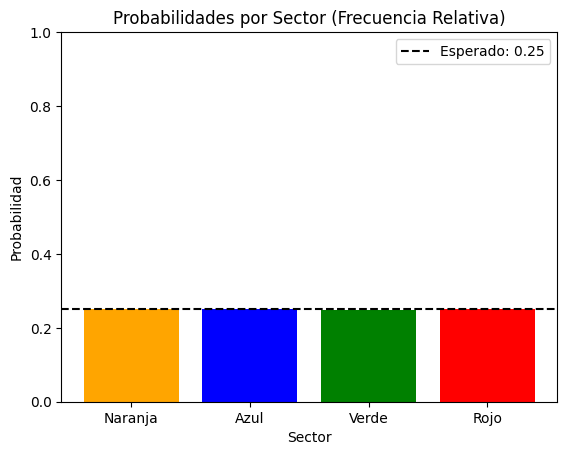

In [20]:
# Lista de sectores y sus probabilidades (frecuencias relativas)
sectores = list(conteo.keys())
probabilidades = [conteo[sector] / n for sector in sectores]

# Gráfica de barras con probabilidades
plt.bar(sectores, probabilidades, color=['orange', 'blue', 'green', 'red'])

# Líneas y etiquetas
plt.ylim(0, 1)
plt.axhline(0.25, color='black', linestyle='--', label='Esperado: 0.25')
plt.title("Probabilidades por Sector (Frecuencia Relativa)")
plt.ylabel("Probabilidad")
plt.xlabel("Sector")
plt.legend()
plt.show()


Todos los sectores son igual de probables cuando pasa mucho tiempo:

$$
\boxed{
x_n ≈ y_n ≈ z_n ≈ t_n ≈ \frac{1}{4}
}
$$